In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Data

In [2]:
Preds_1 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_1st_iteration.xlsx', index_col=0)
Preds_2 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_2nd_iteration.xlsx', index_col=0)
Preds_3 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_3rd_iteration.xlsx', index_col=0)
Preds_4 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_4th_iteration.xlsx', index_col=0)
Preds_5 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_5th_iteration.xlsx', index_col=0)
Preds_6 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_6th_iteration.xlsx', index_col=0)
Preds_7 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_7th_iteration.xlsx', index_col=0)
Preds_8 = pd.read_excel('../Data/Predicted Data/All Points CE Predictions for each iteration/all_predictions_8th_iteration.xlsx', index_col=0)

Preds_1['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_1['Predicted CE']/100)))
Preds_2['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_2['Predicted CE']/100)))
Preds_3['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_3['Predicted CE']/100)))
Preds_4['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_4['Predicted CE']/100)))
Preds_5['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_5['Predicted CE']/100)))
Preds_6['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_6['Predicted CE']/100)))
Preds_7['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_7['Predicted CE']/100)))
Preds_8['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Preds_8['Predicted CE']/100)))

Preds_1['Predicted Log CE'] = 100 - Preds_1['Predicted CE']
Preds_2['Predicted Log CE'] = 100 - Preds_2['Predicted CE']
Preds_3['Predicted Log CE'] = 100 - Preds_3['Predicted CE']
Preds_4['Predicted Log CE'] = 100 - Preds_4['Predicted CE']
Preds_5['Predicted Log CE'] = 100 - Preds_5['Predicted CE']
Preds_6['Predicted Log CE'] = 100 - Preds_6['Predicted CE']
Preds_7['Predicted Log CE'] = 100 - Preds_7['Predicted CE']
Preds_8['Predicted Log CE'] = 100 - Preds_8['Predicted CE']

Preds_1['Predicted Log CE'] = np.reciprocal(1 - (Preds_1['Predicted CE']/100))
Preds_2['Predicted Log CE'] = np.reciprocal(1 - (Preds_2['Predicted CE']/100))
Preds_3['Predicted Log CE'] = np.reciprocal(1 - (Preds_3['Predicted CE']/100))
Preds_4['Predicted Log CE'] = np.reciprocal(1 - (Preds_4['Predicted CE']/100))
Preds_5['Predicted Log CE'] = np.reciprocal(1 - (Preds_5['Predicted CE']/100))
Preds_6['Predicted Log CE'] = np.reciprocal(1 - (Preds_6['Predicted CE']/100))
Preds_7['Predicted Log CE'] = np.reciprocal(1 - (Preds_7['Predicted CE']/100))
Preds_8['Predicted Log CE'] = np.reciprocal(1 - (Preds_8['Predicted CE']/100))

Recs_1 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/1st_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_2 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/2nd_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_3 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/3rd_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_4 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/4th_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_5 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/5th_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_6 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/6th_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_7 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/7th_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)
Recs_8 = pd.read_excel('../Data/Predicted Data/Recommendations from each iteration/8th_iteration_Recs - epsilon 0 weight 1.xlsx', index_col=0)


Data_in_exp_all = pd.read_excel('../Data/Experimental Data/All CE Data-7 Iters.xlsx', index_col=0)
Initial = pd.read_excel('../Data/Experimental Data/Initial.xlsx', index_col=0)

Recs_1 = Recs_1.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_2 = Recs_2.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_3 = Recs_3.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_4 = Recs_4.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_5 = Recs_5.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_6 = Recs_6.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_7 = Recs_7.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Recs_8 = Recs_8.merge(Data_in_exp_all, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])

Initial['Iter'] = 0
Recs_1['Iter'] = 1
Recs_2['Iter'] = 2
Recs_3['Iter'] = 3
Recs_4['Iter'] = 4
Recs_5['Iter'] = 5
Recs_6['Iter'] = 6
Recs_7['Iter'] = 7
Recs_8['Iter'] = 8

Data_in_iters = pd.concat([Initial, Recs_1, Recs_2, Recs_3, Recs_4, Recs_5, Recs_6, Recs_7, Recs_8])

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(
/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/reshape/me

In [3]:
Data_Space_05 = pd.read_excel('../Data/Data Space/0.05 Mole Interval.xlsx', index_col=0)
Data_Space_10 = pd.read_excel('../Data/Data Space/0.1 Mole Interval.xlsx', index_col=0)
# Data_Space_10_all = pd.read_excel('../Data/Data Space/0.1 Mole Interval Up to 1.xlsx', index_col=0)

Data_Space_05.shape, Data_Space_10.shape #, Data_Space_10_all.shape

((479026, 10), (23251, 10))

# Process Data

In [4]:
Data_in_iters['Log CE'] = np.reciprocal(1 - (Data_in_iters['CE']/100)) # Log scaling
Data_in_iters['Predicted Log CE'] = np.log10(np.reciprocal(1 - (Data_in_iters['Predicted CE']/100))) # Log scaling

Preds_8['<CE> (%)'] = Preds_7['Predicted Log CE']

# By Electrolyte

In [5]:
Gaus_data_DME = Preds_8.loc[Preds_8['DME'] > 0][['<CE> (%)','DME']]
Gaus_data_DEGDME = Preds_8.loc[Preds_8['DEGDME'] > 0][['<CE> (%)','DEGDME']]
Gaus_data_TEGDME = Preds_8.loc[Preds_8['TEGDME'] > 0][['<CE> (%)','TEGDME']]
Gaus_data_CH3DME = Preds_8.loc[Preds_8['CH3DME'] > 0][['<CE> (%)','CH3DME']]
Gaus_data_THF = Preds_8.loc[Preds_8['THF'] > 0][['<CE> (%)','THF']]
Gaus_data_MTHF = Preds_8.loc[Preds_8['MTHF'] > 0][['<CE> (%)','MTHF']]
Gaus_data_THP = Preds_8.loc[Preds_8['THP'] > 0][['<CE> (%)','THP']]
Gaus_data_diethylether = Preds_8.loc[Preds_8['diethyl ether'] > 0][['<CE> (%)','diethyl ether']]
Gaus_data_DEE = Preds_8.loc[Preds_8['DEE'] > 0][['<CE> (%)','DEE']]
Gaus_data_DOL = Preds_8.loc[Preds_8['DOL'] > 0][['<CE> (%)','DOL']]

In [6]:
DME_Data = [np.array(Gaus_data_DME.loc[Gaus_data_DME['DME'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
DEGDME_Data = [np.array(Gaus_data_DEGDME.loc[Gaus_data_DEGDME['DEGDME'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
TEGDME_Data = [np.array(Gaus_data_TEGDME.loc[Gaus_data_TEGDME['TEGDME'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
CH3DME_Data = [np.array(Gaus_data_CH3DME.loc[Gaus_data_CH3DME['CH3DME'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
THF_Data = [np.array(Gaus_data_THF.loc[Gaus_data_THF['THF'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
MTHF_Data = [np.array(Gaus_data_MTHF.loc[Gaus_data_MTHF['MTHF'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
THP_Data = [np.array(Gaus_data_THP.loc[Gaus_data_THP['THP'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
diethylether_Data = [np.array(Gaus_data_diethylether.loc[Gaus_data_diethylether['diethyl ether'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
DEE_Data = [np.array(Gaus_data_DEE.loc[Gaus_data_DEE['DEE'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]
DOL_Data = [np.array(Gaus_data_DOL.loc[Gaus_data_DOL['DOL'] == i, '<CE> (%)']) for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]]

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/3245960809.py:56: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_ylim(0,10000)
/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/3245960809.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([' ', ' ', '0', '90', '99', '99.9', '99.99'], size=12)


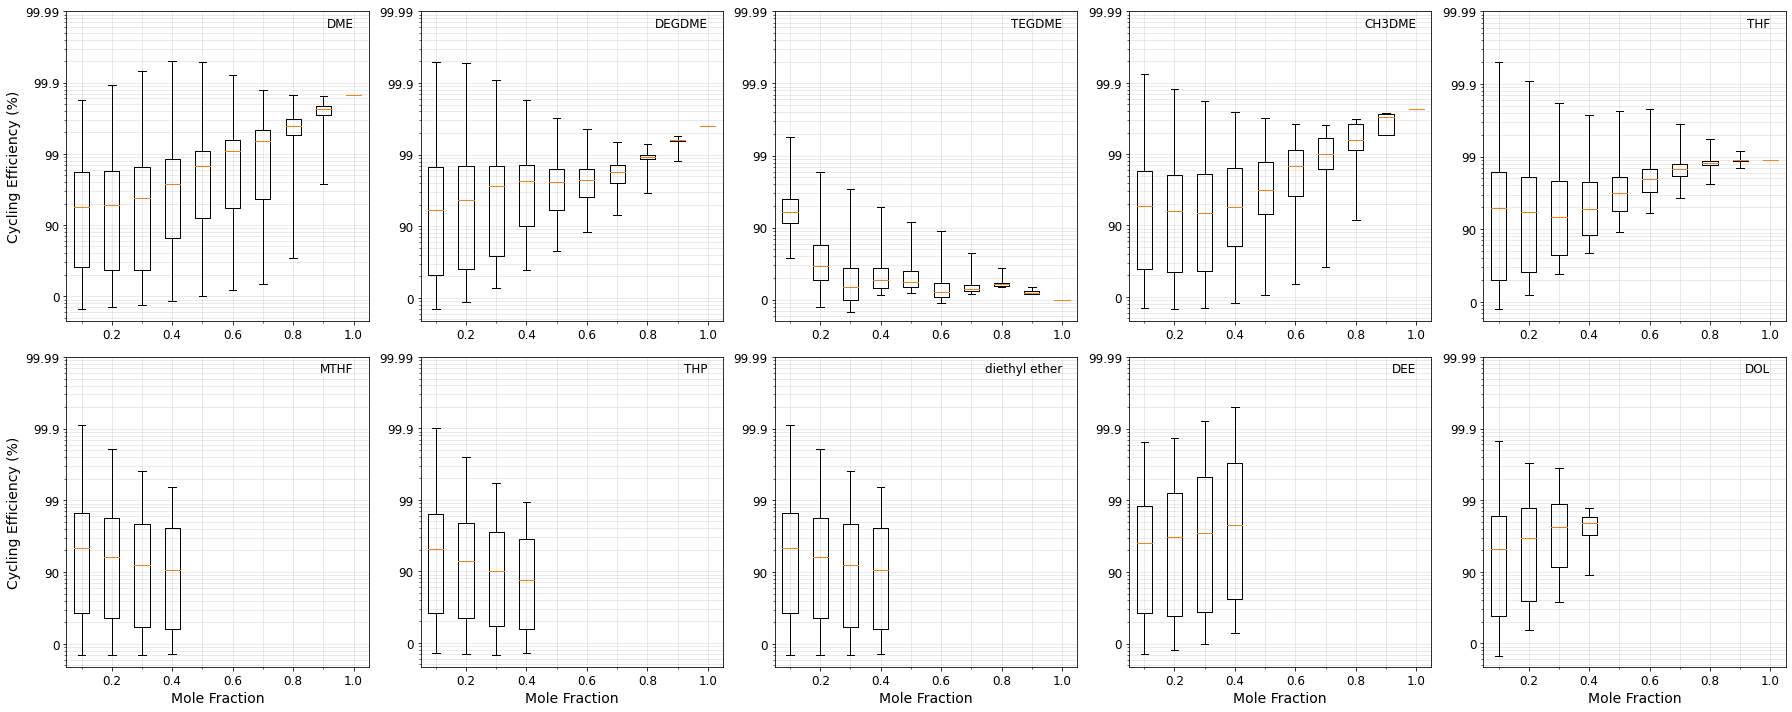

In [7]:
#fig,ax=plt.subplots(1,figsize=(15,12), facecolor='white')
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))



upper_frac = 100
lower_frac = 0

axs[0,0].annotate('DME', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[0,0].boxplot(DME_Data, whis=(lower_frac,upper_frac))
axs[0,0].set_ylabel('Cycling Efficiency (%)', size=14)

axs[0,1].annotate('DEGDME', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[0,1].boxplot(DEGDME_Data, whis=(lower_frac,upper_frac))

axs[0,2].annotate('TEGDME', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[0,2].boxplot(TEGDME_Data, whis=(lower_frac,upper_frac))

axs[0,3].annotate('CH3DME', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[0,3].boxplot(CH3DME_Data, whis=(lower_frac,upper_frac))

axs[0,4].annotate('THF', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[0,4].boxplot(THF_Data, whis=(lower_frac,upper_frac))

axs[1,0].annotate('MTHF', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[1,0].boxplot(MTHF_Data, whis=(lower_frac,upper_frac))
axs[1,0].set_ylabel('Cycling Efficiency (%)', size=14)
axs[1,0].set_xlabel('Mole Fraction', size=14)

axs[1,1].annotate('THP', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[1,1].boxplot(THP_Data, whis=(lower_frac,upper_frac))
axs[1,1].set_xlabel('Mole Fraction', size=14)

axs[1,2].annotate('diethyl ether', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[1,2].boxplot(diethylether_Data, whis=(lower_frac,upper_frac))
axs[1,2].set_xlabel('Mole Fraction', size=14)

axs[1,3].annotate('DEE', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[1,3].boxplot(DEE_Data, whis=(lower_frac,upper_frac))
axs[1,3].set_xlabel('Mole Fraction', size=14)

axs[1,4].annotate('DOL', xy=(0.95,0.95), xycoords='axes fraction', size=12, ha='right')
axs[1,4].boxplot(DOL_Data, whis=(lower_frac,upper_frac))
axs[1,4].set_xlabel('Mole Fraction', size=14)

for ax in axs:
    for axes in ax:
        axes.grid(color='gray',axis='both',alpha=0.2, which='both')
        axes.set_axisbelow(True)
        axes.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=12)
        axes.set_facecolor('none')
        axes.set_xticks(np.arange(2,11,2))
        axes.set_xticks(np.arange(1,11,1), minor=True)
        axes.set_xticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=12)
        axes.set_yscale('Log')
        axes.set_ylim(0,10000)
        axes.set_yticklabels([' ', ' ', '0', '90', '99', '99.9', '99.99'], size=12)


plt.tight_layout()
plt.show()

# By Comp #

In [8]:
Preds_8['Comps'] = np.count_nonzero(Preds_8[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']], axis=1)

Gaus_data_C1 = Preds_8.loc[Preds_8['Comps'] == 1]['<CE> (%)']
Gaus_data_C2 = Preds_8.loc[Preds_8['Comps'] == 2]['<CE> (%)']
Gaus_data_C3 = Preds_8.loc[Preds_8['Comps'] == 3]['<CE> (%)']
Gaus_data_C4 = Preds_8.loc[Preds_8['Comps'] == 4]['<CE> (%)']
Gaus_data_C5 = Preds_8.loc[Preds_8['Comps'] == 5]['<CE> (%)']

Gaus_Comps = [np.array(Gaus_data_C1), np.array(Gaus_data_C2), np.array(Gaus_data_C3), np.array(Gaus_data_C4), np.array(Gaus_data_C5)]

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/237186023.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['1', '2', '3', '4', '5'])
/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/237186023.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim(0,10000)
/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/237186023.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([' ', ' ', '0', '90', '99', '99.9', '99.99'], size=12)


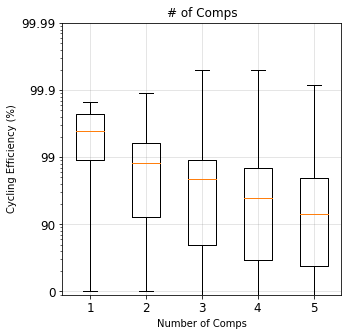

In [20]:
fig,ax2 = plt.subplots(1,figsize=(5,5), facecolor='white')

ax2.grid(color='gray',axis='both',alpha=0.25)
ax2.set_axisbelow(True)
ax2.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=12)
ax2.set_facecolor('none')
ax2.set_xticklabels(['1', '2', '3', '4', '5'])
ax2.set_ylabel('Cycling Efficiency (%)')
#ax2.set_ylim(-0.1,4)
ax2.set_xlabel('Number of Comps')
ax2.set_yscale('Log')
ax2.set_ylim(0,10000)
ax2.set_yticklabels([' ', ' ', '0', '90', '99', '99.9', '99.99'], size=12)

upper_frac2 = 100
lower_frac2 = 0

ax2.set_title('# of Comps')
ax2.boxplot(Gaus_Comps, whis=(lower_frac2,upper_frac2))

#plt.tight_layout()
plt.show()

# t-SNE

In [18]:
Data_Space_10_C = Data_Space_10.copy()
Data_Space_10_C['Comps'] = np.count_nonzero(Data_Space_10[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']], axis=1)

In [45]:
Data_Space_10_CE = Data_Space_10.copy()

Data_Space_10_CE = Data_Space_10_CE.merge(Data_in_iters, how='left', on=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'])
Data_Space_10_CE = pd.concat(([Data_Space_10_CE, Data_in_iters])).drop_duplicates(subset=['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL'], keep='first').reset_index(drop=True)

Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0, 'Log CE'] = np.reciprocal(1 - (Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['<CE> (%)']/100))

TSNE_ec = TSNE(n_components=2,init='pca',random_state=73, angle = 0.3, perplexity=150, n_iter=250)

Space_tsne = TSNE_ec.fit_transform(Data_Space_10_CE[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']])
tsne_result = pd.DataFrame(data = Space_tsne , columns=["TC1","TC2"]).reset_index(drop=True)

/opt/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


# Labeling

In [46]:
Data_Space_10_L = Data_Space_10.copy().reset_index(drop=True)

Data_Space_10_L['Label'] = np.zeros(Data_Space_10_L.shape[0])
Data_Space_10_L['Max Conc'] = np.zeros(Data_Space_10_L.shape[0])
Data_Space_10_L['Comps'] = np.zeros(Data_Space_10_L.shape[0])

Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'DME', 'Label'] = 1
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'DEGDME', 'Label'] = 2
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'TEGDME', 'Label'] = 3
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'CH3DME', 'Label'] = 4
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'THF', 'Label'] = 5

Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'MTHF', 'Label'] = 6
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'THP', 'Label'] = 7
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'diethyl ether', 'Label'] = 8
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'DEE', 'Label'] = 9
Data_Space_10_L.loc[Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].idxmax(axis=1) == 'DOL', 'Label'] = 10

Data_Space_10_L['Max Conc'] = Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']].max(axis=1)

Data_Space_10_L['Comps'] = np.count_nonzero(Data_Space_10_L[['DME', 'DEGDME', 'TEGDME', 'CH3DME', 'THF', 'MTHF', 'THP', 'diethyl ether', 'DEE', 'DOL']], axis=1)

Data_Space_10_L['TC1'], Data_Space_10_L['TC2'] = tsne_result['TC1'], tsne_result['TC2']

Data_Space_10_CE['TC1'], Data_Space_10_CE['TC2'] = tsne_result['TC1'], tsne_result['TC2']

# Plotting

In [47]:
Preds_1['TC1'], Preds_1['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_2['TC1'], Preds_2['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_3['TC1'], Preds_3['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_4['TC1'], Preds_4['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_5['TC1'], Preds_5['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_6['TC1'], Preds_6['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_7['TC1'], Preds_7['TC2'] = tsne_result['TC1'], tsne_result['TC2']
Preds_8['TC1'], Preds_8['TC2'] = tsne_result['TC1'], tsne_result['TC2']

Preds_1 = Preds_1.sort_values(by='Predicted Log CE', ascending=True)
Preds_2 = Preds_2.sort_values(by='Predicted Log CE', ascending=True)
Preds_3 = Preds_3.sort_values(by='Predicted Log CE', ascending=True)
Preds_4 = Preds_4.sort_values(by='Predicted Log CE', ascending=True)
Preds_5 = Preds_5.sort_values(by='Predicted Log CE', ascending=True)
Preds_6 = Preds_6.sort_values(by='Predicted Log CE', ascending=True)
Preds_7 = Preds_7.sort_values(by='Predicted Log CE', ascending=True)
Preds_8 = Preds_8.sort_values(by='Predicted Log CE', ascending=True)

Data_Space_10_CE = Data_Space_10_CE.sort_values(by='Log CE', ascending=True)

/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/106144193.py:27: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = axs[0,1].scatter(Preds_1['TC1'][::eo], Preds_1['TC2'][::eo], edgecolors='grey', cmap='bwr', c = Preds_1['Predicted Log CE'][::eo],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
/var/folders/n0/8fxhskld1wsc76dqzmh0f_9w0000gn/T/ipykernel_913/106144193.py:28: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  axs[0,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE

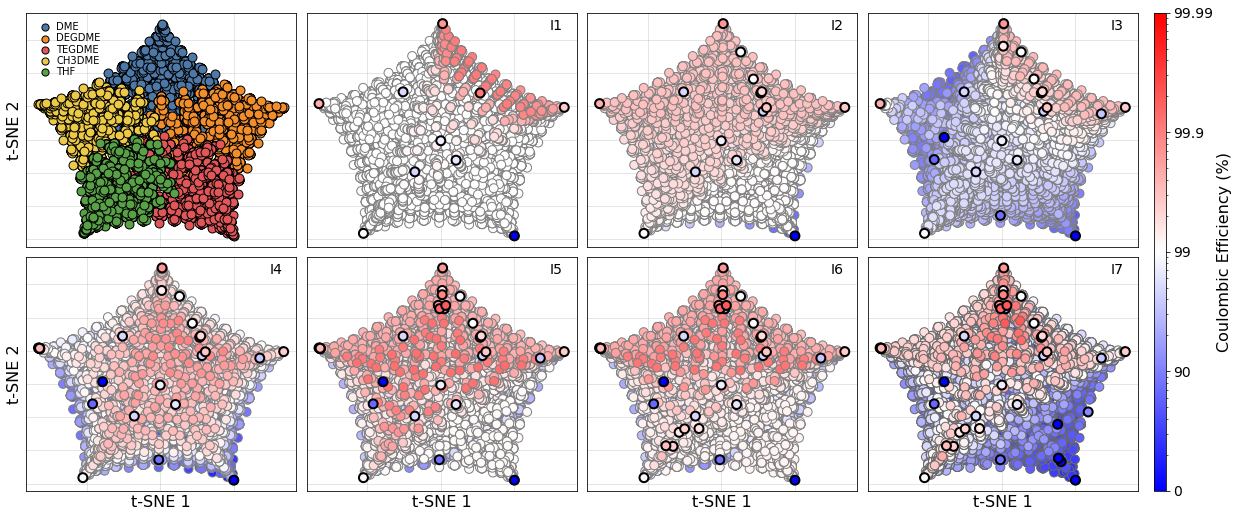

In [ ]:
LW = 1
eo = 1

#fig,ax=plt.subplots(1,figsize=(15,12), facecolor='white')
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 7.2), facecolor='white')

for ax in axs:
    for axes in ax:
        axes.grid(color='gray',axis='both',alpha=0.25)
        axes.set_axisbelow(True)
        axes.tick_params(left=False, bottom=False, labelleft = False, labelbottom=False, labelsize=14)
        axes.set_facecolor('white')

#axs[0,0].grid(color='gray',axis='both',alpha=0.0)
#axs[0,0].set_axisbelow(False)
#axs[0,0].imshow(image)

axs[0,0].set_ylabel('t-SNE 2', size=16)
axs[0,0].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 1]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 1]['TC2'], edgecolors='k', c = '#4E79A7',  s=80, marker='o', label='DME', lw=LW)
axs[0,0].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 2]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 2]['TC2'], edgecolors='k', c = '#F28E2B',  s=80, marker='o', label='DEGDME', lw=LW)
axs[0,0].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 3]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 3]['TC2'], edgecolors='k', c = '#E15759',  s=80, marker='o', label='TEGDME', lw=LW)
axs[0,0].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 4]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 4]['TC2'], edgecolors='k', c = '#EDC948',  s=80, marker='o', label='CH3DME', lw=LW)
axs[0,0].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 5]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 5]['TC2'], edgecolors='k', c = '#59A147',  s=80, marker='o', label='THF', lw=LW)
axs[0,0].legend(frameon=True, framealpha=0.0, fontsize=10, markerscale=0.8, labelspacing=0.125, handletextpad=0.1, ncol=1, columnspacing=0, loc=2)

axs[0,1].annotate('I1', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
im = axs[0,1].scatter(Preds_1['TC1'][::eo], Preds_1['TC2'][::eo], edgecolors='grey', cmap='bwr', c = Preds_1['Predicted Log CE'][::eo],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[0,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[0,2].annotate('I2', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[0,2].scatter(Preds_2['TC1'], Preds_2['TC2'], edgecolors='grey', cmap='bwr', c = Preds_2['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[0,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='k', cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=240, marker='*',  vmin=0, vmax=4)
# axs[0,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[0,3].annotate('I3', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[0,3].scatter(Preds_3['TC1'], Preds_3['TC2'], edgecolors='grey', cmap='bwr', c = Preds_3['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[0,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[0,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[1,0].annotate('I4', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[1,0].scatter(Preds_4['TC1'], Preds_4['TC2'], edgecolors='grey', cmap='bwr', c = Preds_4['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,0].set_xlabel('t-SNE 1', size=16)
axs[1,0].set_ylabel('t-SNE 2', size=16)
# axs[0,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[1,1].annotate('I5', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[1,1].scatter(Preds_5['TC1'], Preds_5['TC2'], edgecolors='grey', cmap='bwr', c = Preds_5['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,1].set_xlabel('t-SNE 1', size=16)
# axs[1,0].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[1,2].annotate('I6', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[1,2].scatter(Preds_6['TC1'], Preds_6['TC2'], edgecolors='grey', cmap='bwr', c = Preds_6['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,2].set_xlabel('t-SNE 1', size=16)
# axs[1,1].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

axs[1,3].annotate('I7', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
axs[1,3].scatter(Preds_7['TC1'], Preds_7['TC2'], edgecolors='dimgrey', cmap='bwr', c = Preds_7['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
axs[1,3].set_xlabel('t-SNE 1', size=16)
# axs[1,2].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 7]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 7]['TC2'], edgecolors='k', cmap='bwr', c = 'limegreen',  s=240, marker='*')

# axs[1,4].annotate('I8', xy=(0.95,0.975), xycoords='axes fraction', size=14, ha='right', va='top')
# axs[1,4].scatter(Preds_8['TC1'], Preds_8['TC2'], edgecolors='dimgrey', cmap='bwr', c = Preds_8['Predicted Log CE'],  s=80, marker='o', lw=1, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 0]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 1]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 2]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 3]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 4]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 5]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 6]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].scatter(Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 7]['TC1'], Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 7]['TC2'], edgecolors='black',  cmap='bwr', c = Data_Space_10_CE.loc[Data_Space_10_CE['Iter'] == 7]['Log CE'],  s=80, marker='o', lw=2, norm=mpl.colors.LogNorm(), vmin=1, vmax=10000)
# axs[1,4].set_xlabel('t-SNE 1', size=16)

# axs[1,3].set_title('Data by Primary Component', size=18)
# axs[1,3].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 1]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 1]['TC2'], edgecolors='k', c = 'red',  s=80, marker='o', label='DME')
# axs[1,3].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 2]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 2]['TC2'], edgecolors='k', c = 'yellow',  s=80, marker='o', label='DEGDME')
# axs[1,3].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 3]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 3]['TC2'], edgecolors='k', c = 'orange',  s=80, marker='o', label='TEGDME')
# axs[1,3].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 4]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 4]['TC2'], edgecolors='k', c = 'green',  s=80, marker='o', label='CH3DME')
# axs[1,3].scatter(Data_Space_10_L.loc[Data_Space_10_L['Label'] == 5]['TC1'], Data_Space_10_L.loc[Data_Space_10_L['Label'] == 5]['TC2'], edgecolors='k', c = 'blue',  s=80, marker='o', label='THF')
# axs[1,3].legend()

#fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8, wspace=0.02, hspace=0.02)

cb_ax = fig.add_axes([1.005, 0.0575 , 0.01, 0.9225])
cbar = fig.colorbar(im, cax=cb_ax, shrink = 1, pad=0.05, orientation='vertical')
cbar.set_label(label='Coulombic Efficiency (%)', size=16)
cbar.set_ticks([1,10,100,1000,10000])
cbar.set_ticklabels(('0', '90', '99', '99.9', '99.99'))
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()

# plt.savefig('../Data/Exported Figures/t-SNE by Iter.png', dpi=600, bbox_inches='tight')

plt.show()